In [18]:
import plotly.express as px

In [25]:
df_pie = df[["전기차충전기유무", "급속충전기유무", "완속충전기유무"]]
df_pie

,전기차충전기유무,급속충전기유무,완속충전기유무
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1090,0,0,0
1091,0,0,0
1092,0,0,0
1093,0,0,0


In [37]:
df_count = df_pie.sum(axis = 0).reset_index()
df_count.columns = ["종류", ]

,index,0
0,전기차충전기유무,132
1,급속충전기유무,27
2,완속충전기유무,122


In [27]:
df_pie[df_pie.sum(axis = 1) == 3]

,전기차충전기유무,급속충전기유무,완속충전기유무
13,1,1,1
20,1,1,1
52,1,1,1
74,1,1,1
98,1,1,1
246,1,1,1
276,1,1,1
298,1,1,1
617,1,1,1
657,1,1,1


In [40]:
px.bar(df_pie["0"], template ='simple_white')

KeyError: ignored

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 1.라이브러리 및 데이터 로드

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [5]:
import os
os.listdir()

['.config', '최종파일0503.csv', 'filtered.csv', '2차작업결과.csv', 'sample_data']

In [6]:
df = pd.read_csv("최종파일0503.csv")
df_1 = pd.read_csv('filtered.csv')

In [7]:
df_model = df.join(df_1)
# df_model.to_csv("2차작업전.csv", index = False)

In [8]:
df_fp = df_model[df_model["confusion"] == "FP"]
# df_electric = df_model[(df_model["confusion"] == "TP") | (df_model["confusion"] == "FN")]
# df_electric

In [9]:
df_fp

,fid,id,left,top,right,bottom,관광여가오락수,교육수,부동산수,생활서비스수,...,완속충전기유무,RandomForestClassifier의 P(y=1)_x,XGBClassifier의 P(y=1),LGBMClassifier의 P(y=1),CatBoostClassifier의 P(y=1),RandomForestClassifier의 P(y=1)_y,평균 P(y=1)의 확률,rf_prediction,actual,confusion
0,1,790,206153.585523,449218.165378,206253.585523,449118.165378,0,0,0,3,...,0,0.280141,0.135634,0.138989,1.018357e-05,0.29,0.168955,1,0,FP
1,2,791,206153.585523,449118.165378,206253.585523,449018.165378,7,0,0,3,...,0,0.159872,0.015576,0.000051,4.875577e-09,0.20,0.075100,1,0,FP
3,4,789,206153.585523,449318.165378,206253.585523,449218.165378,1,0,1,4,...,0,0.179087,0.241374,0.334880,4.847988e-04,0.23,0.197165,1,0,FP
5,6,787,206153.585523,449518.165378,206253.585523,449418.165378,1,0,2,4,...,0,0.144863,0.026139,0.000200,2.925950e-04,0.13,0.060299,1,0,FP
6,7,784,206153.585523,449818.165378,206253.585523,449718.165378,5,1,1,8,...,0,0.162244,0.013400,0.000037,3.282825e-11,0.13,0.061136,1,0,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1915,890,206353.585523,450818.165378,206453.585523,450718.165378,1,0,1,8,...,0,0.201701,0.167888,0.277703,1.475657e-04,0.17,0.163488,1,0,FP
1086,1918,888,206353.585523,451018.165378,206453.585523,450918.165378,0,0,0,0,...,0,0.286148,0.321557,0.333964,5.544917e-03,0.33,0.255443,1,0,FP
1090,1925,780,206153.585523,450218.165378,206253.585523,450118.165378,1,0,0,3,...,0,0.166692,0.072164,0.004694,5.357092e-07,0.10,0.068710,1,0,FP
1091,1927,781,206153.585523,450118.165378,206253.585523,450018.165378,1,5,0,3,...,0,0.267288,0.118761,0.005505,2.445949e-05,0.31,0.140316,1,0,FP


In [10]:
df_fp["주민등록상거주인구"] = df_fp[['60대총인구수', '50대총인구수', '40대총인구수', '30대총인구수', '20대총인구수']].sum(axis = 1) 

In [11]:
df_fp.head(3)

,fid,id,left,top,right,bottom,관광여가오락수,교육수,부동산수,생활서비스수,...,RandomForestClassifier의 P(y=1)_x,XGBClassifier의 P(y=1),LGBMClassifier의 P(y=1),CatBoostClassifier의 P(y=1),RandomForestClassifier의 P(y=1)_y,평균 P(y=1)의 확률,rf_prediction,actual,confusion,주민등록상거주인구
0,1,790,206153.585523,449218.165378,206253.585523,449118.165378,0,0,0,3,...,0.280141,0.135634,0.138989,1.018357e-05,0.29,0.168955,1,0,FP,230
1,2,791,206153.585523,449118.165378,206253.585523,449018.165378,7,0,0,3,...,0.159872,0.015576,0.000051,4.875577e-09,0.20,0.075100,1,0,FP,27
3,4,789,206153.585523,449318.165378,206253.585523,449218.165378,1,0,1,4,...,0.179087,0.241374,0.334880,4.847988e-04,0.23,0.197165,1,0,FP,279


In [12]:
df_2filter = df_fp[['fid', 'id', 'left', 'top', 'right', 'bottom', '평균 P(y=1)의 확률', "주민등록상거주인구", "전기차" "소매수"]].sort_values(by = ["주민등록상거주인구"], ascending = False)

KeyError: ignored

In [13]:
df_fp_filter = df_fp.drop(1069, axis = 0)

In [14]:
plt.figure(figsize = (8,6))
pop_mean = np.median(df_fp_filter["인구당전기차수"])
retail_mean = np.median(df_fp_filter["소매수"])

sns.scatterplot(data = df_fp_filter, x = "인구당전기차수", y = "소매수", hue = 'label')

plt.axvline(pop_mean, color = "r", linestyle = ":")
plt.axhline(retail_mean, color = "r", linestyle = ":")

plt.title("<급속/완속 충전기 예상입지 구분>", fontsize = 20, fontweight = "bold")
plt.xlabel("인구당전기차수", fontsize = 12, fontweight = "semibold")
plt.ylabel("소매수", fontsize = 12, fontweight = "semibold")

plt.savefig("fastandslow")
plt.show()

ValueError: ignored

<Figure size 800x600 with 0 Axes>

In [3]:
df_fp.to_csv("2차작업결과.csv", index = False)

NameError: ignored

In [16]:
pop_mean = np.median(df_fp["인구당전기차수"])
retail_mean = np.median(df_fp["소매수"])

df_fp.loc[(df_fp['인구당전기차수']> pop_mean) & (df_fp['소매수'] >= retail_mean), 'label'] = "완속우선"
df_fp.loc[(df_fp['인구당전기차수']<= pop_mean) & (df_fp['소매수'] < retail_mean), 'label'] = "추후고려"
df_fp.loc[(df_fp['인구당전기차수']<= pop_mean) & (df_fp['소매수'] >= retail_mean), 'label'] = "급속우선"
df_fp.loc[(df_fp['인구당전기차수']> pop_mean) & (df_fp['소매수'] < retail_mean), 'label'] = "완속우선"
df_fp['label'].value_counts() 

완속우선    199
급속우선    113
추후고려     86
Name: label, dtype: int64

In [ ]:
df_fp

In [83]:
df_fp[['fid', 'id', 'left', 'top', 'right', 'bottom', '평균 P(y=1)의 확률', "주민등록상거주인구", "소매수"]]

,fid,id,left,top,right,bottom,평균 P(y=1)의 확률,주민등록상거주인구,소매수
0,1,790,206153.585523,449218.165378,206253.585523,449118.165378,0.168955,230,3
1,2,791,206153.585523,449118.165378,206253.585523,449018.165378,0.075100,27,4
3,4,789,206153.585523,449318.165378,206253.585523,449218.165378,0.197165,279,0
5,6,787,206153.585523,449518.165378,206253.585523,449418.165378,0.060299,444,5
6,7,784,206153.585523,449818.165378,206253.585523,449718.165378,0.061136,607,7
...,...,...,...,...,...,...,...,...,...
1084,1915,890,206353.585523,450818.165378,206453.585523,450718.165378,0.163488,229,8
1086,1918,888,206353.585523,451018.165378,206453.585523,450918.165378,0.255443,0,0
1090,1925,780,206153.585523,450218.165378,206253.585523,450118.165378,0.068710,407,4
1091,1927,781,206153.585523,450118.165378,206253.585523,450018.165378,0.140316,204,8


In [56]:
df["주민등록상거주인구"] = df[['60대총인구수', '50대총인구수', '40대총인구수', '30대총인구수', '20대총인구수']].sum(axis = 1) 
df[df["완속충전기유무"] == 1]["주민등록상거주인구"].describe()

count     122.000000
mean      280.795082
std       212.071598
min         0.000000
25%       137.250000
50%       260.500000
75%       412.250000
max      1015.000000
Name: 주민등록상거주인구, dtype: float64

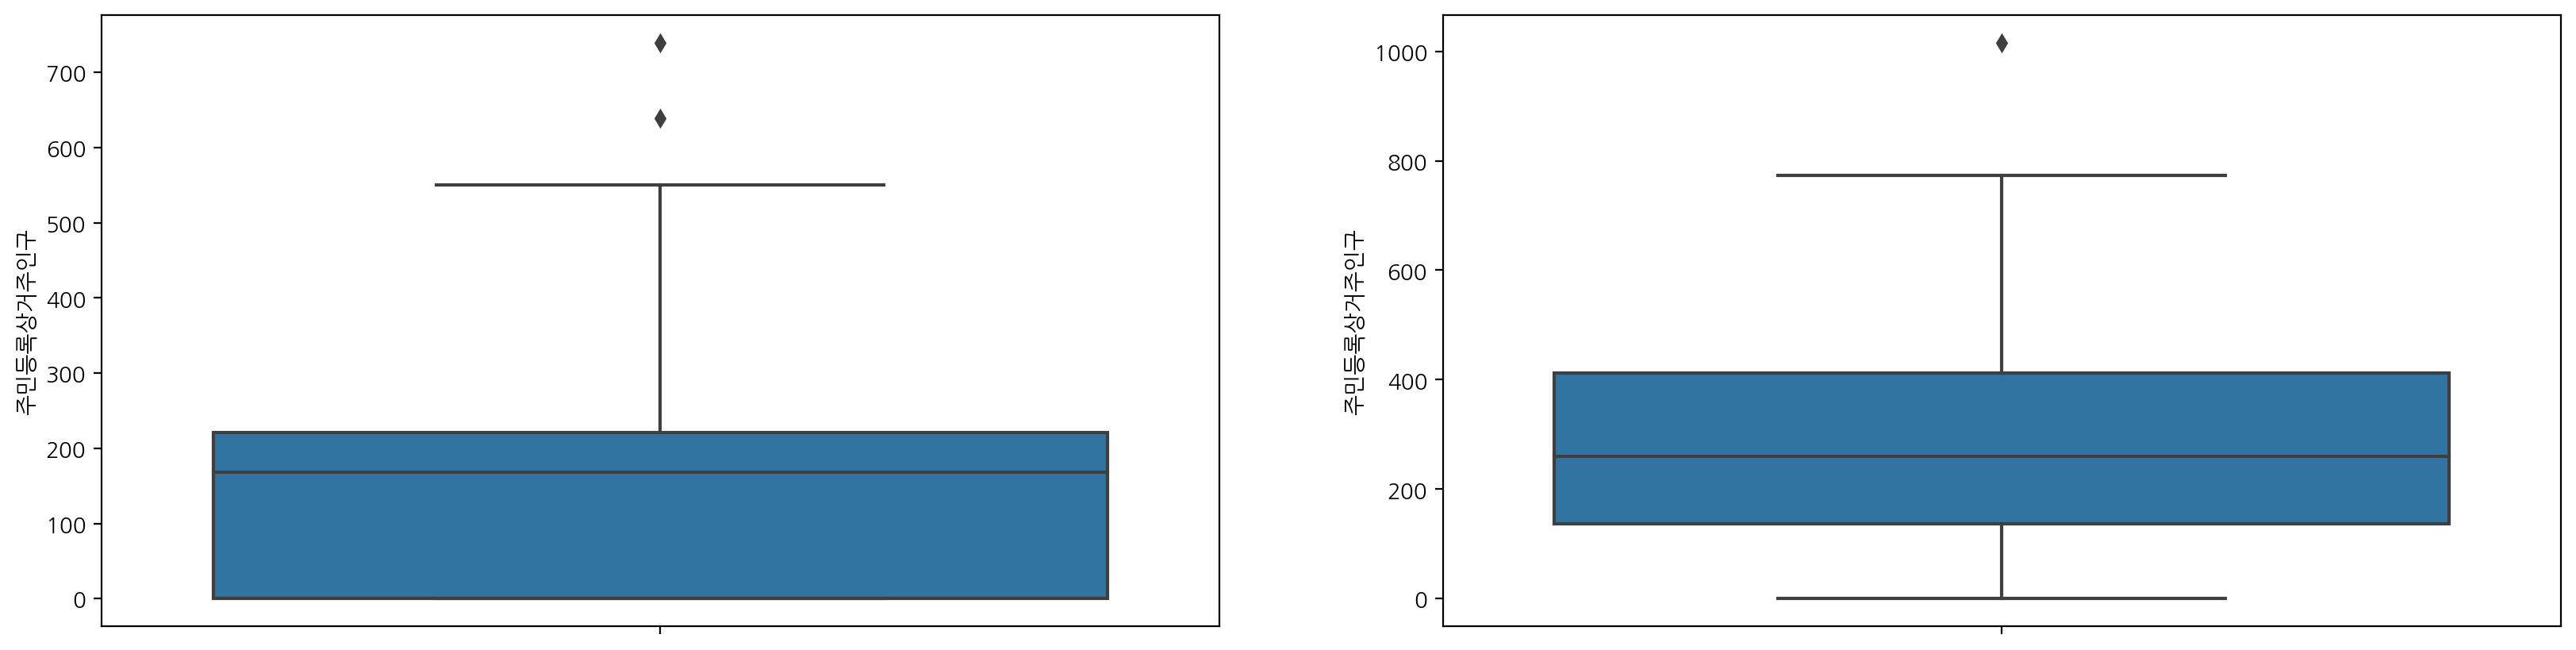

In [73]:
df[df["급속충전기유무"] == 1]["주민등록상거주인구"].describe()

fig, axs = plt.subplots(figsize=(20, 5), ncols=2)
# sns.boxplot(data = df_null[df_null["급속충전기유무"] == 1], y = "주민등록상거주인구", ax = axs[0])
# sns.boxplot(data = df_null[df_null["완속충전기유무"] == 1], y = "주민등록상거주인구", ax = axs[1])
# plt.show()

sns.histplot(data = df[df["급속충전기유무"] == 1], y = "주민등록상거주인구", ax = axs[0])
sns.histplot(data = df[df["완속충전기유무"] == 1], y = "주민등록상거주인구", ax = axs[1])
plt.show()

In [72]:
drop_row = df[df["주민등록상거주인구"] == 0].index
df_null = df.drop(drop_row, axis = 0)
df_null["주민등록상거주인구"].describe()

count     938.000000
mean      273.940299
std       168.707373
min         6.000000
25%       150.000000
50%       268.000000
75%       375.000000
max      1223.000000
Name: 주민등록상거주인구, dtype: float64

In [26]:
df_model.columns

Index(['fid', 'id', 'left', 'top', 'right', 'bottom', '관광여가오락수', '교육수', '부동산수',
       '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수', '총건물수', '승차총승객수', '하차총승객수',
       '대지면적', '단독건물수', '건물면적', '공동건축물수', '60대총인구수', '50대총인구수', '40대총인구수',
       '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율',
       '생산가능인구여성비율', '인구당전기차수', '병원수', '어린이집수', '학교수', '주차장주차면수', '전기차충전기수',
       '급속충전기수', '완속충전기수', '전기차충전기유무', '급속충전기유무', '완속충전기유무',
       'RandomForestClassifier의 P(y=1)_x', 'XGBClassifier의 P(y=1)',
       'LGBMClassifier의 P(y=1)', 'CatBoostClassifier의 P(y=1)',
       'RandomForestClassifier의 P(y=1)_y', '평균 P(y=1)의 확률', 'rf_prediction',
       'actual', 'confusion'],
      dtype='object')

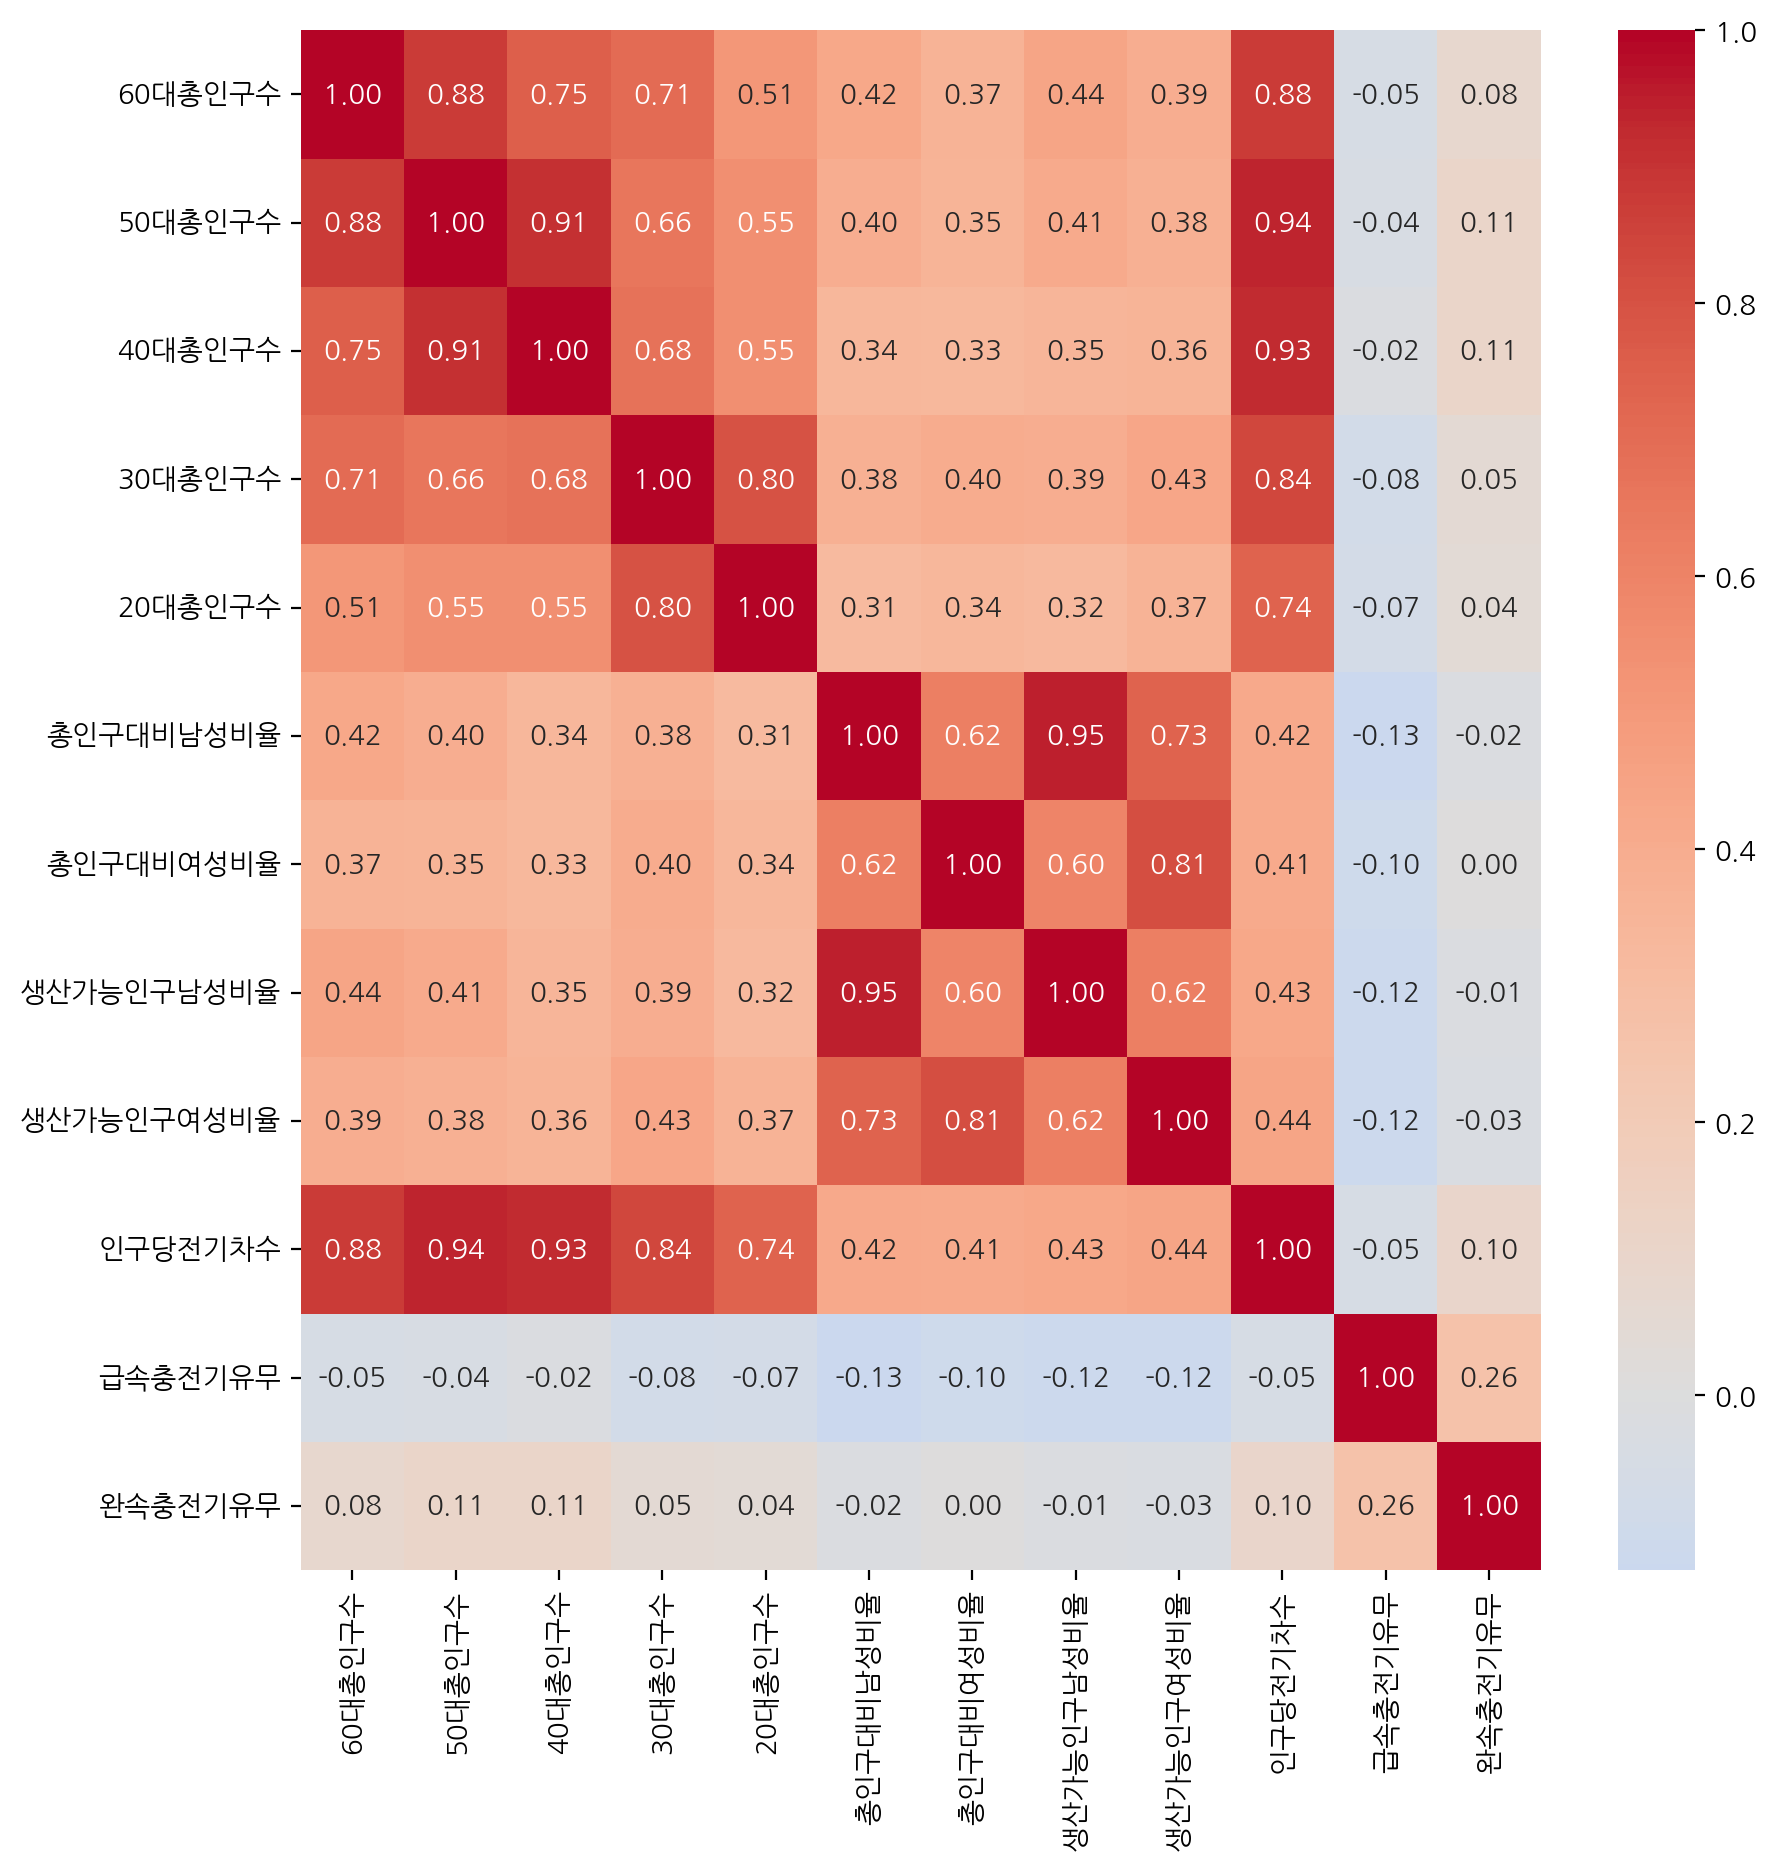

In [25]:
# df[['관광여가오락수', '교육수', '부동산수', '생활서비스수', '소매수', '숙박수', 
#     '스포츠수', '음식수', '전기차충전기수', '급속충전기수', '완속충전기수']].corr()
corr_pop = df_model[['60대총인구수', '50대총인구수', '40대총인구수',
       '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율',
       '생산가능인구여성비율', '인구당전기차수', '급속충전기유무', '완속충전기유무']].corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr_pop, annot = True, fmt = ".2f", cmap = "coolwarm", center = 0)

plt.show()

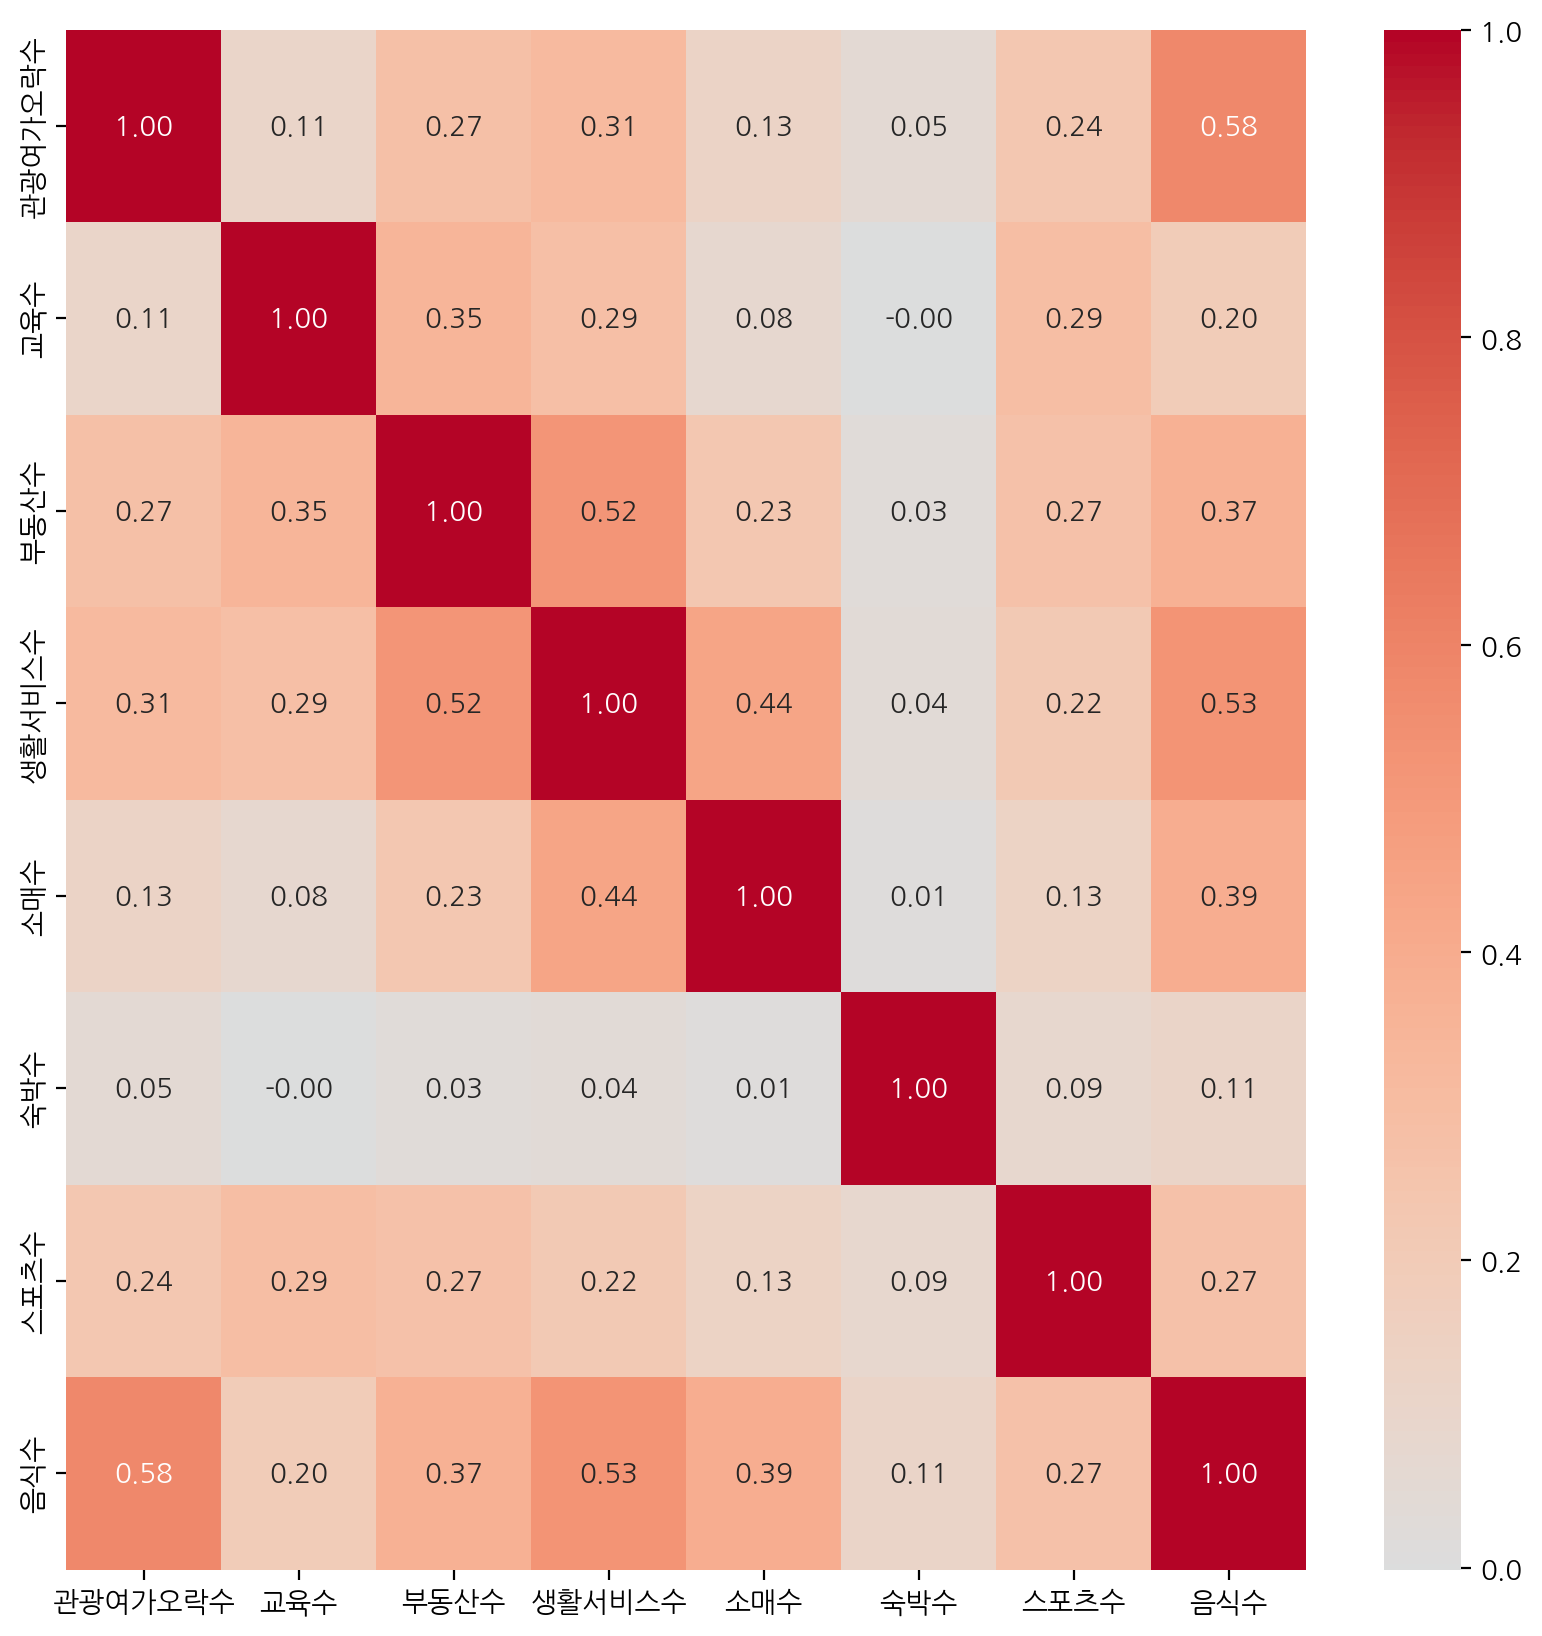

In [27]:
corr_pop = df_model[[ '관광여가오락수', '교육수', '부동산수',
                     '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수']].corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr_pop, annot = True, fmt = ".2f", cmap = "coolwarm", center = 0)

plt.show()

In [115]:
test = df_fp.loc[:,["인구당전기차수", "소매수"]].reset_index()

In [116]:
train = df_electric.loc[:,["인구당전기차수", "소매수", "전기차충전기유무", "급속충전기유무", "완속충전기유무"]].reset_index()

In [117]:
train

,index,인구당전기차수,소매수,전기차충전기유무,급속충전기유무,완속충전기유무
0,9,11.236064,2,1,0,1
1,12,8.758547,0,1,0,1
2,13,0.000000,0,1,1,1
3,16,11.933957,0,1,0,1
4,17,9.072599,1,1,0,1
...,...,...,...,...,...,...
127,1061,6.560187,1,1,0,1
128,1063,5.897189,10,1,0,1
129,1074,13.277399,0,1,1,1
130,1077,5.966978,3,1,0,1


In [124]:
train["완속충전기유무_1"] = train["완속충전기유무"].replace(1,2)
train["class"] = train[["전기차충전기유무", "급속충전기유무", "완속충전기유무_1"]].sum(axis = 1)

In [142]:
# train["class"] = train["class"].replace({3:"완속",
#                                          4:"둘다",
#                                          2:"급속"})
train["class"].value_counts()

3    105
4     17
2     10
Name: class, dtype: int64

In [125]:
train

,index,인구당전기차수,소매수,전기차충전기유무,급속충전기유무,완속충전기유무,완속충전기유무_1,class
0,9,11.236064,2,1,0,1,2,3
1,12,8.758547,0,1,0,1,2,3
2,13,0.000000,0,1,1,1,2,4
3,16,11.933957,0,1,0,1,2,3
4,17,9.072599,1,1,0,1,2,3
...,...,...,...,...,...,...,...,...
127,1061,6.560187,1,1,0,1,2,3
128,1063,5.897189,10,1,0,1,2,3
129,1074,13.277399,0,1,1,1,2,4
130,1077,5.966978,3,1,0,1,2,3


In [162]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [135]:
test = test[["인구당전기차수", "소매수"]]
test

,인구당전기차수,소매수
0,4.483957,3
1,0.785129,4
2,5.652927,0
3,8.723653,5
4,10.974355,7
...,...,...
393,5.094613,8
394,0.000000,0
395,9.299414,4
396,5.024824,8


In [163]:
lr = LogisticRegression(random_state = 100)
lgbc = LGBMClassifier(random_state = 100)

X = train[["인구당전기차수","소매수"]]
y = train["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 100,
                                                    stratify = y)
# cv = cross_validate(estimator = lr,
#                     X = X,
#                     y = y,
#                     scoring = 'accuracy')
# print(cv["test_accuracy"])

lgbc.fit(X_train, y_train)
preds = lgbc.predict(X_test)
accuracy_score(y_test, preds)

0.7037037037037037

In [164]:
# scikit-learn 0.22 버전부터 기본적으로 5-겹 교차 검증으로 바뀌었다.
basic_scores = cross_val_score(lgbc, X, y)
# 물론 cv 매개변수를 이용하여 k겹의 k를 변경가능하다.
# 하지만, 교차검증에서는 대게 5겹 교차 검증을 자주 사용한다.

print('기본 교차 검증 점수 : ', basic_scores)
# print('3-겹 교차 검증 점수 : ', cv3_scores)

기본 교차 검증 점수 :  [0.74074074 0.51851852 0.76923077 0.84615385 0.76923077]


In [160]:
test_preds = lr.predict(test)

In [161]:
test_preds

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,